In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def plot_data(xvals, yvals, n, show = True, label = ''):
#     n = len[xvals]
    plt.plot(xvals[:n], yvals[:n], label=label)
    if show:
#         if label != '':
        plt.legend()
        plt.show()

In [30]:
v0 = 0
sigma_w = 9
sigma_n = 12
count = 3000

x0 = 10

# noise
w = np.random.normal(v0, sigma_w, count)

w1 = np.insert(w, 0, x0)
x = w1.cumsum()

measurement_err = np.random.normal(0, sigma_n, count)
z = x[:-1] + measurement_err

No handles with labels found to put in legend.


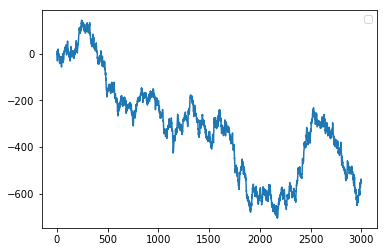

No handles with labels found to put in legend.


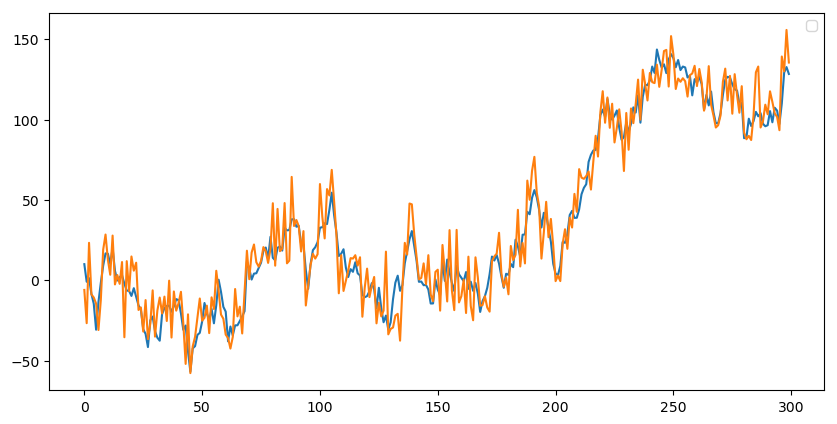

In [31]:
# plot_data(range(count), w, count)
# plot_data(range(300), w, 300)

n = x.shape[0]
plot_data(range(n), x, n)

figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
plot_data(range(300), x, 300, False)
plot_data(range(300), z, 300)

#     plt.plot(range(count), vals)

#Scatter plot creation - Flux = f(Sunspots)
# plt.scatter(spots, flux, 1, label = 'Flux to sunspots relation in the same month')

# plt.title('Scatter plot: monthly mean sunspot number and solar radio flux F10.7cm')
# plt.ylabel('Monthly solar radio flux at 10.7 cm')
# plt.xlabel('Monthly sunspots number')
# plt.legend()
# plt.show()

In [32]:
# residual vi
res_vi = z[1:] - z[:-1]
res_roi = z[2:] - z[:-2]

def calc_mexp(n):
    m_exp_v = np.sum(res_vi[:n]**2) / n
    m_exp_ro = np.sum(res_roi[:n]**2) / n
    
    sigma_w_calc = np.sqrt(m_exp_ro - m_exp_v )
    sigma_n_calc = np.sqrt(m_exp_v - 0.5 * m_exp_ro)
    
    print ("n = {}, sigma_w {}:{}, sigma_ro {}:{}".format(n, sigma_w, sigma_w_calc, sigma_n, sigma_n_calc))
    return sigma_w_calc, sigma_n_calc

sigma_w_calc, sigma_n_calc = calc_mexp(300)
sigma_w_calc, sigma_n_calc = calc_mexp(3000)


# print ("n = {}, sigma_w {}:{}, sigma_ro {}:{}".format(3000, sigma_w, sigma_w_calc, sigma_n, sigma_n_calc))
# print ("n = {}, sigma_w {}:{}, sigma_ro {}:{}".format(300, sigma_w, sigma_w_calc, sigma_n, sigma_n_calc))

n = 300, sigma_w 9:6.194986964331518, sigma_ro 12:13.435711655272195
n = 3000, sigma_w 9:9.77001381599663, sigma_ro 12:11.920419840909686


In [33]:
# optimal smoothing coefficient in exponential smoothing
ksi = sigma_w_calc / sigma_n_calc

alpha = 0.5 * (- ksi + np.sqrt(ksi**2 + 4 * ksi))

In [49]:
# Perform exponential smoothing with the determined smoothing coefficient
# for xi in iter():

# it = np.nditer([x, None], flags=['external_loop'], op_axes=[[0, -1, -1], [-1, 0, 1], None])
# it = np.nditer([x, None], flags=['external_loop'])

def exponent_smoothing(z, alpha):
    n = z.shape[0]
    x_cap = [x0]
    for i in range(1, z.shape[0]):
    #     x_cap.append(alpha * z[i] + (1 -  alpha) * x_cap[i-1])
        x_cap.append(x_cap[i-1] + alpha * (z[i] - x_cap[i-1]))
#     x_back = x_cap[::-1]
    
    back = np.empty(n + 1)
    back[n] = x_cap[n - 1]
    for i in range(n-1, 0, -1):
        back[i] = back[i+1] + alpha * (x_cap[i] - back[i+1])
    return x_cap, back

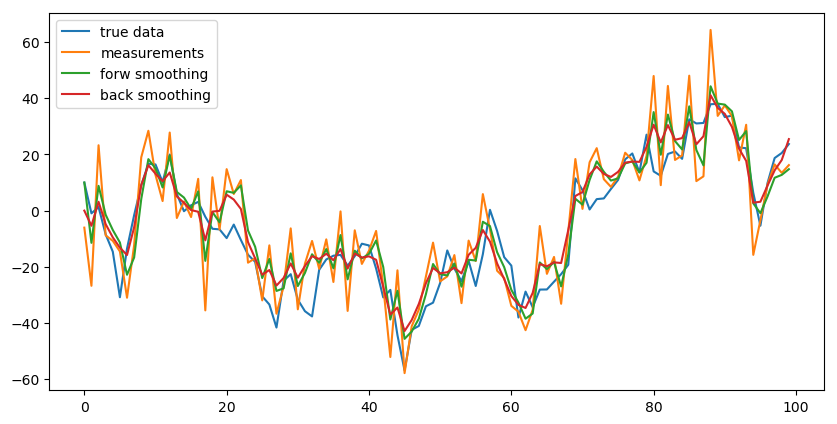

In [50]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
x_forw, x_back = exponent_smoothing(z, alpha)
# , label='Running mean of flux to sunspots relation in the same month'
n_points = 100

plot_data(range(n_points), x, n_points, False, 'true data')
plot_data(range(n_points), z, n_points, False,'measurements')
plot_data(range(n_points), x_forw, n_points, False, 'forw smoothing')
plot_data(range(n_points), x_back, n_points, True, 'back smoothing')

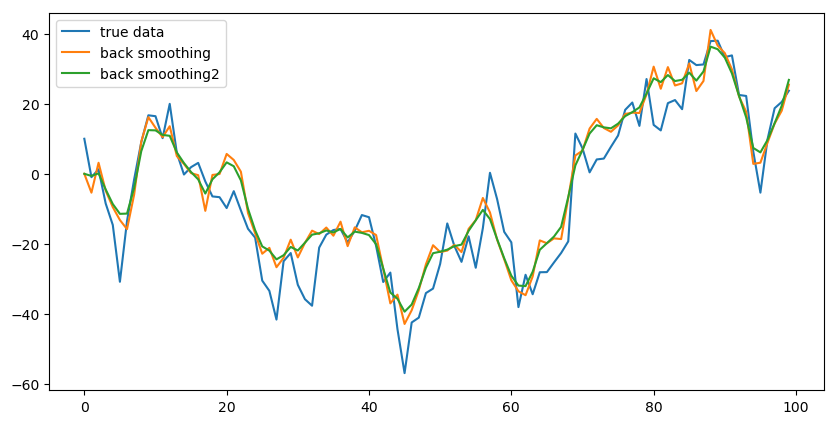

In [59]:
figure(num=None, figsize=(10, 5), dpi=100, facecolor='w', edgecolor='k')
xf2, x_back2 = exponent_smoothing(z, alpha * 1.2)
xf3, x_back3 = exponent_smoothing(x_back2, alpha)
n_points = 100

plot_data(range(n_points), x, n_points, False, 'true data')
# plot_data(range(n_points), z, n_points, False,'measurements')
# plot_data(range(n_points), xf3, n_points, False, 'forw smoothing')
plot_data(range(n_points), x_back, n_points, False, 'back smoothing')
plot_data(range(n_points), x_back3, n_points, True, 'back smoothing2')